In [21]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np

In [22]:
infile = open('accuracyDL.pkl','rb')
DL = pickle.load(infile)
infile.close()
oszi = DL[DL.Sentence > 54.0]

In [23]:
oszi
# ab 55, 56 schlecht
# ab 57 hoch
# ab 58 wieder tief
# ab 59 wieder hoch
# ab 60 wieder sehr hoch

,Sentence,Accuracy,Precision,Recall,F1,AUC
53,55.0,0.841060,0.883303,0.919626,0.901099,0.876403
54,56.0,0.848784,0.879752,0.940454,0.909091,0.878632
55,57.0,0.868132,0.888000,0.952790,0.919255,0.894619
56,58.0,0.840619,0.867822,0.937939,0.901519,0.878311
57,59.0,0.856164,0.886417,0.938042,0.911499,0.879041
58,60.0,0.879007,0.903990,0.947712,0.925335,0.912726


In [26]:
path='matrices_allsessions/matrix55.pkl'
infile = open(path,'rb')
df55 = pickle.load(infile)
infile.close()
df55=df55.reset_index()

path='matrices_allsessions/matrix56.pkl'
infile = open(path,'rb')
df56 = pickle.load(infile)
infile.close()
df56=df56.reset_index()

path='matrices_allsessions/matrix57.pkl'
infile = open(path,'rb')
df57 = pickle.load(infile)
infile.close()
df57=df57.reset_index()

path='matrices_allsessions/matrix58.pkl'
infile = open(path,'rb')
df58 = pickle.load(infile)
infile.close()
df58=df58.reset_index()

path='matrices_allsessions/matrix59.pkl'
infile = open(path,'rb')
df59 = pickle.load(infile)
infile.close()
df59=df59.reset_index()

path='matrices_allsessions/matrix60.pkl'
infile = open(path,'rb')
df60 = pickle.load(infile)
infile.close()
df60=df60.reset_index()

In [28]:
df = df55.append(df56)
df = df.append(df57)
df = df.append(df58)
df = df.append(df59)
df = df.append(df60)

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1116784987.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df55.append(df56)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1116784987.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df57)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1116784987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df58)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1116784987.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df59)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1116784987.py:5: FutureWarning: The frame.appe

In [37]:
sns.countplot(data=df, y='Schwierigkeit',hue='ID')

KeyboardInterrupt: 

In [32]:
df

,UebungsID,ID,Erstloesung,Schussel,Erfolg,Schwierigkeit,ist_Schulzeit,MehrfachFalsch,vorher_abgebrochen,y,...,HA__nt,HA__vt,HA__zt,Sex__m,Sex__w,Testposition__pruefung,Testposition__training,Testposition__version,OrderNumber,steps
0,12187126_1,55,22,0,40,-0.200858,1,0,0,1,...,0,0,0,1,0,3,20,32,55,0
1,12551974_2,55,18,0,37,0.018270,0,1,1,0,...,0,0,0,1,0,14,14,27,55,0
2,12551979_3,55,7,0,40,0.344908,0,0,1,0,...,0,0,0,0,1,19,9,27,55,0
3,13891007_1,55,22,1,36,-0.106883,1,1,0,0,...,0,1,0,1,0,0,15,40,55,0
4,14281257_1,55,20,2,41,0.334286,1,0,0,1,...,0,0,0,1,0,12,17,26,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,21657119_1,60,22,0,38,0.529364,1,7,0,1,...,0,1,0,1,0,14,16,30,60,0
3310,21658024_1,60,20,0,44,-1.507700,1,6,0,1,...,0,0,0,0,1,14,15,31,60,0
3311,21659402_1,60,22,0,45,0.576991,1,1,0,1,...,0,0,1,0,1,14,17,29,60,0
3312,21667353_1,60,26,0,40,-0.444647,0,1,0,1,...,0,0,1,1,0,5,19,36,60,0


In [14]:
# baseline model
def build_model():
	# create model
	model = Sequential()
	model.add(Dense(24, input_dim=24, activation='relu'))
	model.add(Dense(48, activation='relu'))
	model.add(Dense(24, activation='relu'))
	model.add(Dense(12, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
		
	return model

In [15]:
accuracyDL= pd.DataFrame(columns=['Sentence', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
n = [50,51,52,53,54,55,56,57,58,59,60]
feature_cols = ['Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben', 'Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training','Testposition__version', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K', 'Art__LB','UserAttribut', 'OrderNumber', 'steps']

for i in n:
    path='matrices_allsessions/matrix'+str(i)+'.pkl'
    infile = open(path,'rb')
    df = pickle.load(infile)
    infile.close()
    df=df.reset_index()

    y_len = len(feature_cols)
    X = df[feature_cols].astype(float)
    y = df.y
    y= y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    model = build_model()

    model.compile(
        loss="binary_crossentropy",
        optimizer='Adam',
        metrics=["accuracy"]
    )

    model.fit(
        x=X_train,
        y=y_train,
        epochs=10,
        batch_size=128,
        verbose=0,
        validation_data=(X_test, y_test)
    )

    scores = model.evaluate(
        x=X_test,
        y=y_test,
        verbose=0
    )
    #print(scores)

    yhat_probs = model.predict(X_test, verbose=0)
    yhat_classes =  (model.predict(X_test) > 0.5).astype("int32")
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]

    accuracy = accuracy_score(y_test, yhat_classes)
    precision = precision_score(y_test, yhat_classes)
    recall = recall_score(y_test, yhat_classes)
    f1 = f1_score(y_test, yhat_classes)
    auc = roc_auc_score(y_test, yhat_probs)
    
    accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


63/63 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


59/59 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


55/55 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


51/51 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


47/47 [==============================] - 0s 3ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


44/44 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


43/43 [==============================] - 0s 3ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


39/39 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


36/36 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


34/34 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


32/32 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_9416\1705908177.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)


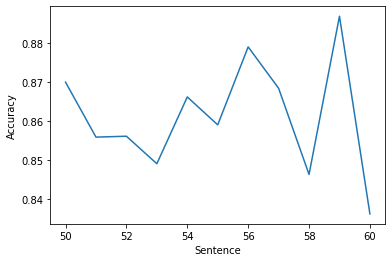

In [18]:
ax = sns.lineplot(data=accuracyDL, x='Sentence', y='Accuracy', palette="dark:#5A9_r")

In [19]:
accuracyDL

,Sentence,Accuracy,Precision,Recall,F1,AUC
0,50.0,0.869915,0.908145,0.931533,0.91969,0.90411
1,51.0,0.855841,0.91234,0.906836,0.90958,0.88574
2,52.0,0.856074,0.919273,0.900927,0.910007,0.893795
3,53.0,0.849033,0.909524,0.899529,0.904499,0.88566
4,54.0,0.866131,0.897581,0.938449,0.91756,0.885386
5,55.0,0.858984,0.88796,0.944,0.915123,0.87684
6,56.0,0.878944,0.914137,0.941071,0.927409,0.902561
7,57.0,0.868357,0.896654,0.942089,0.91881,0.888383
8,58.0,0.846288,0.867495,0.945824,0.904968,0.868961
9,59.0,0.886792,0.928652,0.935006,0.931818,0.900829
